## DataFrame查看数据分布

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### 1. 构造数据
> 我们构造一个项目的相关数据，有项目名称：开发语言，收藏数，点赞数。开发者人数。

#### 1.1 构造项目数组

In [2]:
data = []

language_list = np.array(["Python", "C", "JavaScript", "Golang", "Rust", "Java"])
for i in range(10000):
    item = {
        "project": "project:{}".format(i + 1),
        "member": np.random.randint(3, 180),
        "star": np.random.randint(0, 2000),
        # "language": language_list[np.random.randint(1, len(language_list))]
        # 根据概率来选择语言，这样画的图形好对比
        "language": np.random.choice(language_list, size=1, replace=True, p=[0.5, 0.15, 0.15, 0.12, 0.05, 0.03])[0]
    }
    data.append(item)

In [3]:
len(data)

10000

#### 1.2 实例化为DataFrame

In [4]:
frame = pd.DataFrame(data)

In [5]:
# 查看数据的前面5条
frame.head()

,project,member,star,language
0,project:1,10,1012,Python
1,project:2,149,1260,Python
2,project:3,125,768,Python
3,project:4,75,765,Golang
4,project:5,69,1255,Python


In [6]:
# 查看语言是Rust的member列
# frame.loc[frame["language"] == "Rust", "member"]

# 查看语言是Rust的行
frame.loc[frame["language"] == "Rust"]

,project,member,star,language
24,project:25,79,342,Rust
27,project:28,4,780,Rust
31,project:32,167,1928,Rust
58,project:59,124,294,Rust
75,project:76,97,723,Rust
...,...,...,...,...
9902,project:9903,102,1245,Rust
9906,project:9907,80,313,Rust
9932,project:9933,72,1239,Rust
9950,project:9951,79,537,Rust


In [7]:
# 修改数据

# 把是Ruby的项目成员数量最多设置为30
frame.loc[frame["language"] == "Rust", "member"] %= 30

frame.loc[frame["language"] == "Golang", "member"] %= 60

frame.loc[frame["language"] == "C", "member"] %= 100

frame.loc[frame["language"] == "Java", "member"] %= 90

frame.loc[frame["language"] == "JavaScript", "member"] %= 60

### 2. 根据语言查看数据的分布

In [8]:
language_value_counts = frame['language'].value_counts(ascending=False)
language_value_counts

language
Python        5021
JavaScript    1531
C             1425
Golang        1212
Rust           508
Java           303
Name: count, dtype: int64

In [9]:
type(language_value_counts)

pandas.core.series.Series

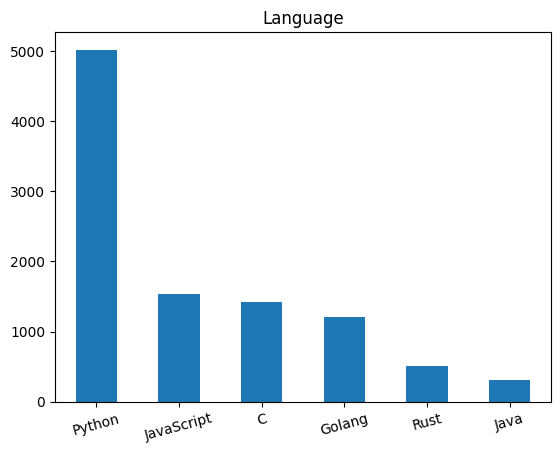

In [10]:
# 画出水平直方图
language_value_counts.plot.bar()
plt.title("Language")
# x坐标斜着45度
plt.xticks(rotation=15)  
plt.xlabel("")  # 不要显示x的label
plt.show()

### 3. 根据语言查看成员分布情况
> `boxplot`方法是创建箱型图(Boxplot)，这是一种展示数据分布特征的图形。   

箱型图通常包括：中位数(Q2)、四分位数（Q1和Q3）、异常值（通常定义为超出四分位距1.5倍的值）等信息。

In [11]:
# 查看语言和成员列
frame[["language", "member"]]

,language,member
0,Python,10
1,Python,149
2,Python,125
3,Golang,15
4,Python,69
...,...,...
9995,Java,43
9996,Python,8
9997,Java,29
9998,Golang,51


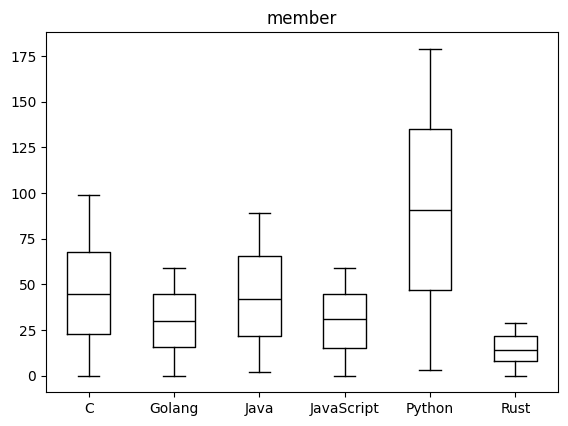

In [12]:
# 画箱型图
frame.boxplot(column=["member"], by="language", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()